In [58]:
import numpy as np
from PIL import Image

In [59]:
def U_matrix(X_size, C_size):
    U=np.ones((X_size, C_size))
    return U
def distance(a, b):
    return np.linalg.norm(a - b)

In [60]:
def computeCentroids(X, U, m, k):
    C = []
    d = X.shape[1]  
    for i in range(k):
        weight_sum = np.power(U[:, i], m).sum()
        Cj = []
        for x in range(d):
            numerator = (X[:,x] * np.power(U[:, i], m)).sum()
            c_val = numerator / weight_sum
            Cj.append(c_val)
        C.append(Cj)
    return np.array(C)

In [61]:
def U_update(X, U, C, k, m):
    X_size = X.shape[0]  
    
    # Precompute the distance matrix between all points and all centroids
    dist_matrix = np.zeros((X_size, k))
    for i in range(k):
        dist_matrix[:, i] = np.linalg.norm(X - C[i], axis=1)
    
   
    dist_matrix[dist_matrix == 0] = 1e-8
    
    # Update the U matrix
    for j in range(k):
        num = dist_matrix[:, j]
        denom = np.sum((num[:, None] / dist_matrix) ** (2 / (m - 1)), axis=1)
        U[:, j] = 1 / denom

    # Normalize U so that the sum across all memberships for a point is 1
    # U /= U.sum(axis=1, keepdims=True)
    
    return U

In [62]:
image = Image.open("milky-way.jpg")
mg_array = np.array(image)
mg_array_flat = mg_array.reshape(-1, mg_array.shape[2])
mg_array_flat.shape

(1048576, 3)

In [104]:
U=np.random.rand(1024*1024,4)
U1=np.zeros(((1024*1024,4)))
epsilon=0.01
while(np.linalg.norm(U-U1)>epsilon):
    C=computeCentroids(mg_array_flat,U, 8,4)
    U1=U
    U= U_update(mg_array_flat, U, C, 4, 8)




In [107]:



max_index=np.argmax(U, axis=1)
rg = np.array([[255, 255, 255],  # Green for Cluster 0
                   [0, 0, 0],
                   [0,255,124],
                   [0,100,45]])



In [108]:
colored_pixels = rg[max_index]
segmented_image = colored_pixels.reshape(mg_array.shape).astype(np.uint8)


In [109]:
segmented_image_pil = Image.fromarray(segmented_image)

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

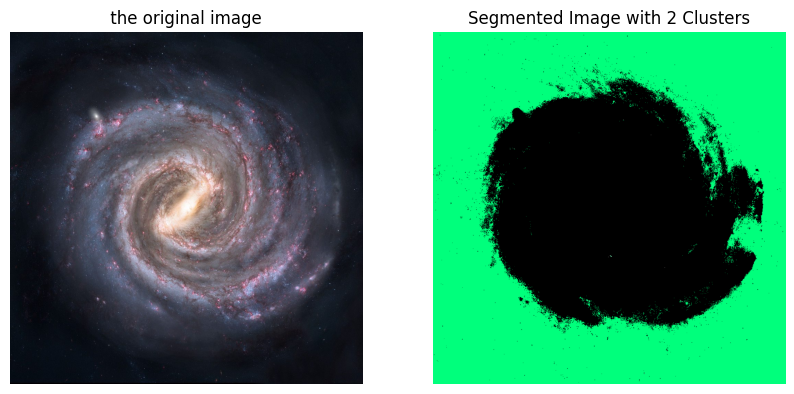

In [110]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)

plt.imshow(image)
plt.title(" the original image ")
plt.axis("off")
plt.subplot(1,2,2)


plt.imshow(segmented_image_pil)
plt.title(f"Segmented Image with {2} Clusters")
plt.axis("off")